In [181]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.special as spec
import scipy.integrate as integrate
import scipy.optimize as opt

In [182]:

#Average of bright and dark counts
def brightDistrobution(Rb, Rd, tb):
    x = (Rb+Rd)*tb
    return x

#Dark counts
def darkDistrobution(Rd, tb):
    x = Rd*tb
    return x

#Bright state detection event Poisson distribution
def Bo(N, Bmean):
    X = (np.power(Bmean,N)) * (np.exp(-1*Bmean)) / spec.factorial(N)
    return X

#Dark state Poisson distribution + extra events due to decay from bright to dark as time increases
def Do(N, Dmean,Rb,Rd,tb,tau):
    X = (np.exp(-1*tb/tau)*(np.power(Dmean,N))*(np.exp(-1*Dmean)) / spec.factorial(N)) + Xo(N,Rb,Rd,tb,tau)
    return X

#Decay term X naught for discrete integral
def Xo(N,RB,RD,tb,tau):
    X0 = []
    for n in N:
        X0 = np.append(X0, (integrate.quad(X_integrand, RD*tb, (RB+RD)*tb, args=(n,RB,RD,tau,tb)))[0])
    return X0

#Decay term X naught for continuous
def XoC(n,RB,RD,tb,tau):
    return (integrate.quad(X_integrand, RD*tb, (RB+RD)*tb, args=(n,RB,RD,tau,tb))[0])
    
#Integrand to be integrated over all lambdas, where lambda(t) is the mean of the poisson distrobution of the number of counts (n) recorded in bin time (tb) when an ion decays at time t (0 < t < tb)
def X_integrand(l,n,RB,RD,tau,tb):
    return (1/(RB*tau))*np.exp((l-((RD+RB)*tb))/(RB*tau))*np.power(l,n)*np.exp(-1*l)/spec.factorial(n)

![alt text](LambdaFunction.PNG)

![alt text](NoDecay.PNG)

In [183]:

#Discrete integrand under the curve of D naught right of the critical count nc (distinguishing point between bright and dark state)
def errorD(Rb,Rd,tb,ND,tau): 
    return np.sum(((np.power(Rd*tb,ND)) * (np.exp(-1*(Rd*tb))) / spec.factorial(ND)) + Xo(ND,Rb,Rd,tb,tau))
    

def errorDi(Rb,Rd,tb,ND,tau): 
    return n

#Discrete integrand under the curve of B naught to be integrated left of the critical count nc
def errorB(Rb,Rd,tb,NB):
    return np.sum((np.power((Rb+Rd)*tb,NB)) * (np.exp(-1*((Rb+Rd)*tb))) / spec.factorial(NB))

![alt text](AndorSpecTable.png)

In [184]:
#Model Settings
nMax = 100 #Max number of detection counts we want to consider
tbMax = .001 #Max bin time we want to consider in s
nStep = 1 #n granularity (realistically 1 -- there is or isn't a count event, no partial events)
tStep = .00001 #time granularity in s (affects curve accuracy)
tbUnits = 1000000 #model uses seconds, conversion for graphing us

#Real Variables
tau = 1.167 #tau = bright state decay time in s (for Ca40 ions)
freq = 10**7 #emission freqency s^-1
colEff = np.array([.015]) #collection efficiency
RB = freq*colEff/2 #Bright state fluoresence rate in s^-1
Rd = 1000 #Detector Dark Counts
#DarkCounts  = np.arange(start=0,stop=5001,step=500)

In [185]:
#Array of possible detection counts
N = np.arange(start=0,stop=nMax,step=nStep)
#Bin times we're considering
BT = np.arange(start=0,stop=tbMax,step=tStep)
BrightEArrays =[]
DarkEArrays = []
AvgEArrays = []
#Different cameras/setups have different dark count rates (Rd)
for Rb in RB:
    #For each potential bin time, the ideal count cutoff (nc) between a dark and bright detection is determined
    darkE = np.empty(0)
    darkE2 = np.empty(0)
    brightE = np.empty(0)
    DE = []


    for tb in BT:
        Bmean = brightDistrobution(Rb,Rd,tb)
        BM = np.full(np.int_(nMax/nStep),Bmean) 
        Dmean = darkDistrobution(Rd,tb)
        DM = np.full(np.int_(nMax/nStep),Dmean)

        #n counts in tb from bright
        B0 = Bo(N,BM) #Poisson distro
        #n counts in tb from dark
        D0 = Do(N,DM,Rb,Rd,tb,tau) #Poisson distro + decay

        #determine count threshold nc
        nc = -1
        lastDiff = np.abs(B0[0]-D0[0])
        for i, item in enumerate(B0):
            diff = (B0[i]-D0[i])
            nc = i
            if((diff>lastDiff) and diff>0):
                break
            lastDiff = diff
        nc=nc*nStep
        print(nc)
        NB = N[np.where(N<=nc)] #Discrete Integral range for eB
        ND = N[np.where(N>=nc)] #Discrete Integral range for eD

        brightE = np.append(brightE, errorB(Rb,Rd,tb,NB))
        darkE = np.append(darkE, errorD(Rb,Rd,tb,ND,tau))
        #darkE2 = np.append(darkE2, errorDi(Rb,Rd,tb,ND,tau))
    BrightEArrays.append(brightE.tolist())
    DarkEArrays.append(darkE.tolist())
    avgE = (darkE+brightE)/2
    AvgEArrays.append(avgE.tolist())
print()

99
1
1
1
1
1
2
2
2
2
2
2
3
3
3
3
3
3
4
4
4
4
4
5
5
5
5
5
6
6
6
6
7
7
8
8
9
9
10
10
10
11
11
12
12
13
13
14
14
15
15
16
16
17
18
18
19
19
20
20
21
21
22
22
23
23
24
24
25
26
26
27
27
28
28
29
30
30
31
31
32
32
33
33
34
35
35
36
36
37
38
38
39
39
40
40
41
42
42
43



Text(0.5, 1.0, 'Fidelity Nmax = 100 Nstep = 1')

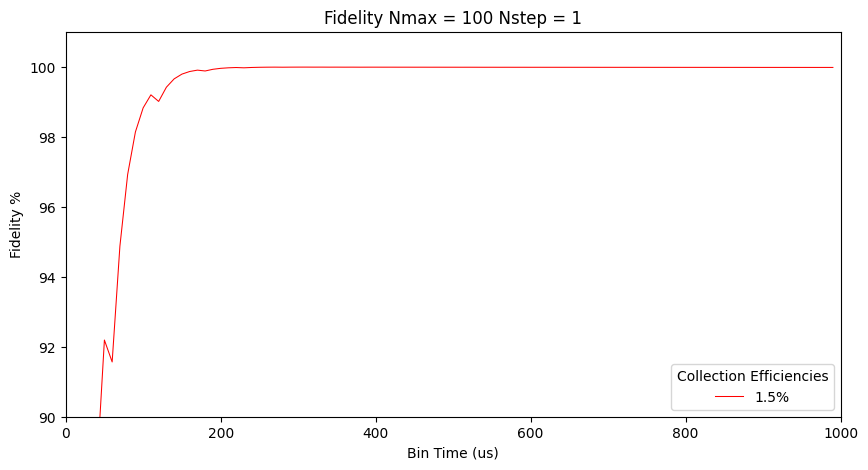

In [186]:
#Plotting the average fidelity as a function of col eff
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)
colors = ['r','g','b']
#for Y in BrightEArrays:
#    ax1.plot(BT*1000000, 100*(1-np.array(Y)), lw=0.75, c="r", label = "|1> Fidelity" )
#for Y in DarkEArrays:
#    ax1.plot(BT*1000000, 100*(1-np.array(Y)), lw=0.75, c="b", label = "|0> Fidelity")
for i, Y in enumerate(AvgEArrays):
    ax1.plot(BT*tbUnits, 100*(1-np.array(Y)), lw=0.75, c=colors[i], label = str(200*RB[i]/freq)+"%")
ax1.set_ylabel("Fidelity %")
ax1.set_xlabel("Bin Time (us)")
ax1.set_xlim(0,tbMax*tbUnits)
ax1.set_ylim(90,101)
ax1.legend(title = "Collection Efficiencies")
plt.title("Fidelity Nmax = "+str(nMax)+" Nstep = "+str(nStep))